In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("7-multiplegradesdataset.csv")

In [3]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [4]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [6]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

Buradan gördüğümüz üzere datasetimiz içerisinde boş olan hücre vs bulunmuyor.

# BAĞIMSIZ DEĞİŞKENLERİN BİRBİRLERİYLE OLAN İLİŞKİSİ VE KORELASYONU

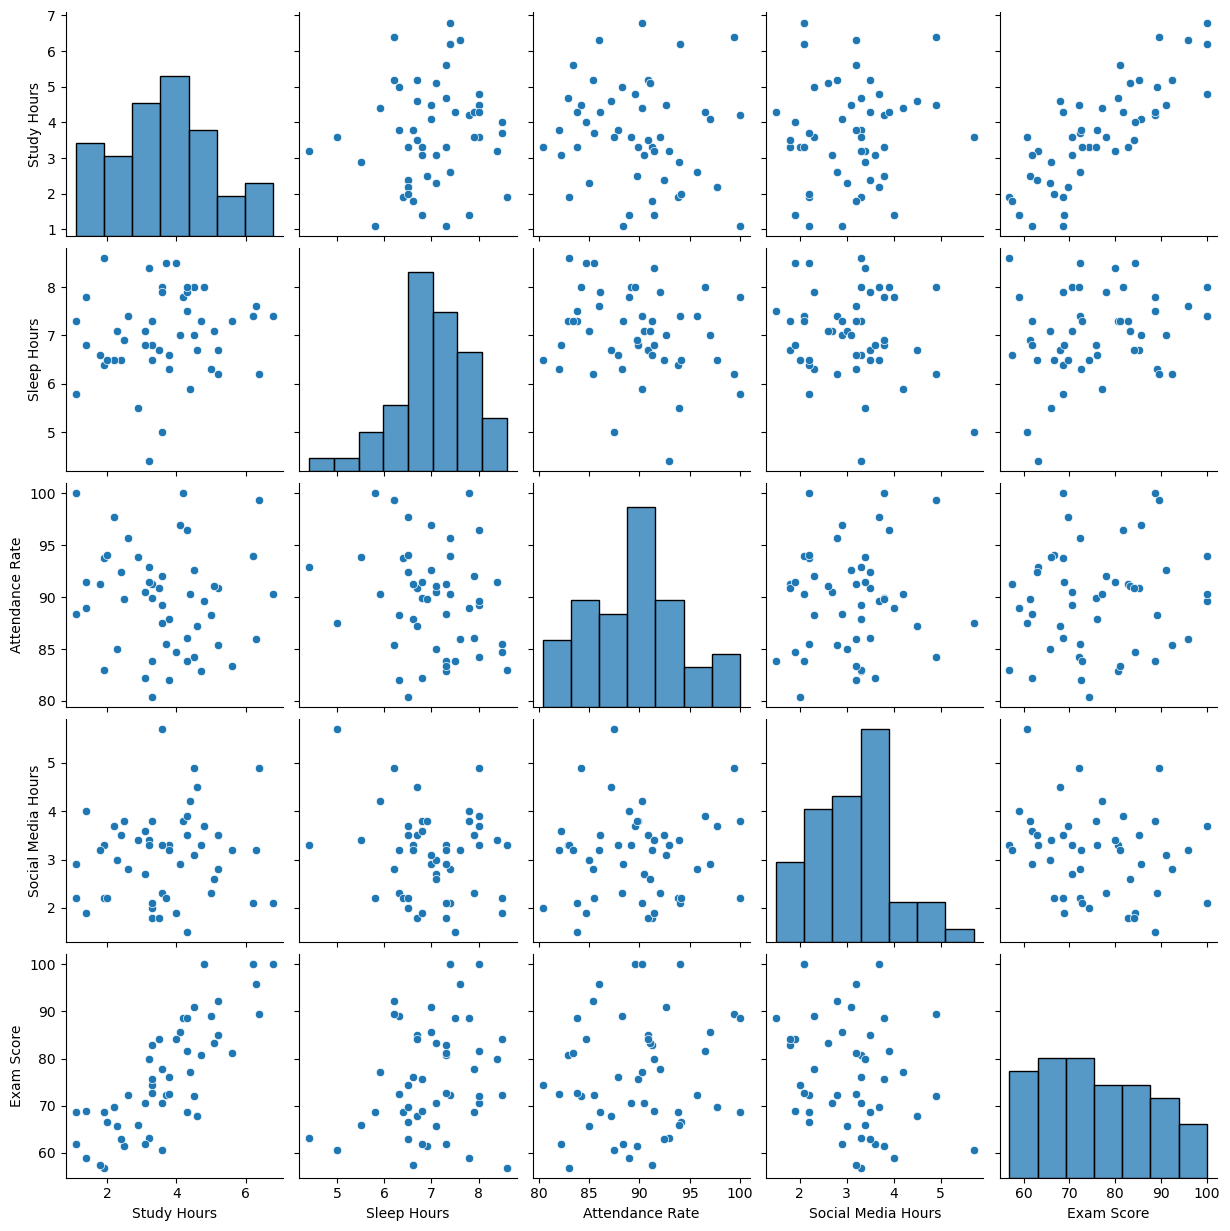

In [7]:
sns.pairplot(df)
plt.show()

Buradan bakarak örneğin Exam Score ile Study Hours arasında olan doğru ilişkiyi net göreebiliyoruz. Social Media Hours ile Exam Score arasında ise tam olarak net belli olmasa da ters bir ilişki olduğu gözüküyor. Bunların korelasyonlarına bakarak da pozitif veya negatif ilişki tanımı yapılabilir.

In [8]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


İki kolon arasındaki ilişkiyi ve ortalarından geçen çizgiyi de aşağıdaki yöntemle görebiliriz.

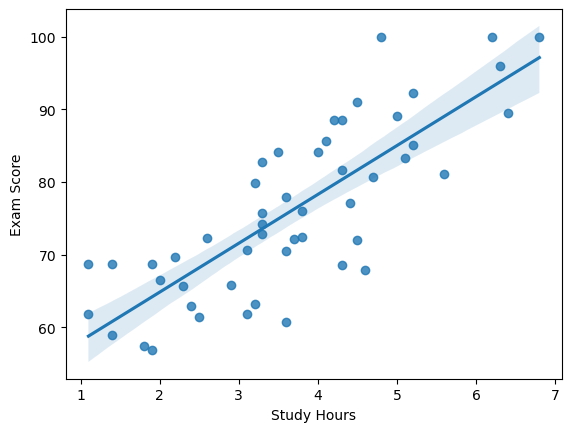

In [11]:
sns.regplot(x = df["Study Hours"], y = df["Exam Score"])
plt.show()

----
# MODEL EĞİTİM KISMI

In [14]:
# bağımsız ve bağımlı değişkenlerin ayarlanması
# normalde aşağıdaki gibi yaparız.

# X = df[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]
# y = df["Exam Score"]

# normalde böyle de yapabiliriz ama aşağıdaki gib bir yazım da görülebilir.

X = df.iloc[:,:-1]    # Bu yazım kolonlardaki en son kolona kadar olanları al demek. Bunu sadece hedef değişken en sondaysa yapabiliriz.
y = df.iloc[:,-1]    # Bu da en sondaki kolonu al demek.

In [15]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [16]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

Gördüğümüz üzere ayırımları yaptık. Şimdi ise train ve test verilerini birbirinden ayıracağım.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=36)

Şimdi ise standartlaştırma işlemini yapacağım.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[ 0.39022114,  0.46500364, -1.20266743, -2.04149604],
       [-0.34505665,  1.51837924,  0.34493849,  0.50313466],
       [-0.34505665, -3.16329008,  0.62632138,  0.36920673],
       [-0.54558696, -1.87583101,  0.82730916,  0.50313466],
       [ 1.72708984,  0.58204537, -0.76049431,  0.2352788 ],
       [-1.28086474, -0.58837195,  0.30474093,  0.2352788 ],
       [-1.54823849, -0.35428849,  0.34493849, -1.50578432],
       [ 1.25918579,  0.23092018, -1.28306254,  0.2352788 ],
       [-0.01083948,  1.63542097, -0.8609882 , -1.10400052],
       [-1.21402131,  1.7524627 , -1.36345765,  0.36920673],
       [-1.74876879, -1.52470582,  2.05333463, -1.10400052],
       [ 0.3233777 ,  0.81612884,  2.05333463,  1.03884639],
       [-1.21402131, -0.82245542,  0.80721039, -1.10400052],
       [-1.54823849,  0.81612884, -0.15753096,  1.30670225],
       [-0.07768291,  1.0502123 , -0.11733341,  0.36920673],
       [-0.41190009, -0.00316329,  0.14395071, -0.43436086],
       [ 1.6602464 ,  0.

In [23]:
X_test

array([[-7.76829112e-02, -2.46103968e+00, -4.59012636e-01,
         3.58347710e+00],
       [-2.78213217e-01, -3.54288488e-01,  2.33580394e-02,
         1.03884639e+00],
       [-7.46117263e-01,  3.47961908e-01,  1.18908717e+00,
        -3.00432928e-01],
       [ 1.89690830e-01,  1.63542097e+00, -1.02177842e+00,
        -1.50578432e+00],
       [ 4.57064570e-01, -1.40766408e+00,  1.03753152e-01,
         1.57455812e+00],
       [-1.01349100e+00, -7.05413687e-01,  1.59106273e+00,
         9.04918459e-01],
       [-1.14717787e+00, -7.05413687e-01,  8.67506721e-01,
        -1.10400052e+00],
       [-8.12960698e-01, -2.37246756e-01,  3.25926132e-03,
         1.03884639e+00],
       [ 8.58125182e-01, -9.39497152e-01, -2.98222411e-01,
        -9.70072588e-01],
       [-2.78213217e-01,  2.30920175e-01,  3.04740933e-01,
        -1.63971225e+00],
       [ 5.23908006e-01,  1.05021230e+00, -1.12227231e+00,
         2.51205364e+00],
       [ 9.91812052e-01, -4.71330221e-01,  2.24345821e-01,
      

Şimdi ise modelimizi eğitme kısmına geldik.

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regression = LinearRegression()

In [26]:
regression.fit(X_train, y_train)

LinearRegression()

Şimdi ise ortaya çıkan model ile test yapalım.

In [28]:
df.iloc[0]    # Yazım şekline bakmak için bunu yaptım.

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [29]:
X_train[0]

array([ 0.39022114,  0.46500364, -1.20266743, -2.04149604])

In [33]:
student = [[5, 7, 90, 4]]

In [34]:
regression.predict(scaler.transform(student))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([80.90722053])

# MODEL BAŞARISI

In [35]:
y_pred = regression.predict(X_test)

In [36]:
y_pred

array([56.64527815, 69.29554222, 74.60615023, 83.36522544, 73.50159989,
       66.91644793, 70.11420952, 63.76536939, 86.31977464, 80.99652768,
       71.05701095, 84.71818491, 70.46034749])

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("mean_squared_error: ",mse)
print("mean_absolute_error: ", mae)

mean_squared_error:  9.928693715390134
mean_absolute_error:  2.746906911153225


In [39]:
r2 = r2_score(y_test, y_pred)

In [40]:
r2

0.8647487024267837

Aşağıdaki gibi yaparak gerçek skorlar ile tahmin skorları arasındaki farkları bulabiliriz.

In [41]:
residuals = y_test - y_pred
residuals

29    4.054722
11    6.404458
18   -2.306150
32    0.834775
12    3.598400
35    2.783552
38   -3.514210
16   -2.365369
2     2.780225
8     1.803472
17    1.042989
7     0.381815
10    3.839653
Name: Exam Score, dtype: float64

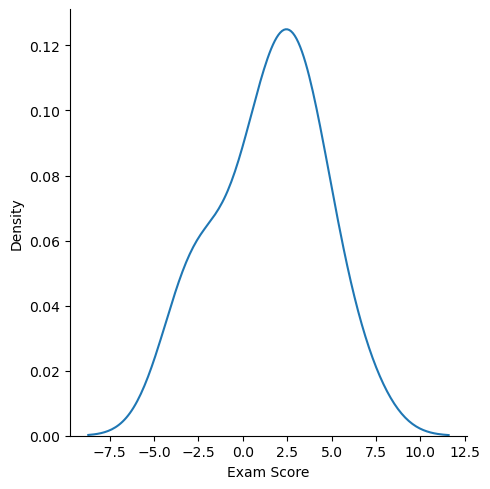

In [42]:
## if residuals are in normal distribution it seems good
sns.displot(residuals,kind='kde')
plt.show()

In [43]:
regression.intercept_

76.55135135135139

In [45]:
regression.coef_   # Burada sırayla kolonların katsayıları (etkileri) görünüyor.

array([10.61589319,  1.86657324,  3.57323475, -3.58521309])

In [46]:
students = [
    [6, 8, 95, 5],
    [3, 6, 85, 4],
    [4, 7, 80, 3]
]

In [47]:
regression.predict(scaler.transform(students))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([88.97719876, 60.93961287, 71.43102935])

Öğrencilerin bu saatleri yaparlarsa alacakları tahmini notları sırasıyla böyleymiş.